**Water Quality Dataset**

This dataset contains information about water quality features and potability. It consists of 3276 entries with 10 columns:
* **pH:** pH of the water (measured in pH units).
* **Hardness:** Hardness of the water (measured in mg/L).
* **Solids:** Total dissolved solids in the water (measured in ppm).
* **Chloramines:** Amount of chloramines in the water (measured in ppm).
* **Sulfate:** Amount of sulfate in the water (measured in mg/L).
* **Conductivity:** Conductivity of the water (measured in μS/cm).
* **Organic_carbon:** Amount of organic carbon in the water (measured in ppm).
* **Trihalomethanes:** Amount of trihalomethanes in the water (measured in μg/L).
* **Turbidity:** Turbidity of the water (measured in NTU).
* **Potability:** Potability of the water (1 indicates potable, 0 indicates non-potable).

**Summary Statistics:**

The dataset contains 3276 entries.
The columns "pH", "Sulfate", and "Trihalomethanes" have missing values.
The data types of the columns are float64 for features and int64 for the target variable (Potability).
Usage:

**This dataset can be used for various tasks, including:**
Exploratory data analysis (EDA) to understand the distributions and relationships between features.
Predictive modeling to predict water potability based on its features.
Feature engineering to create new features or handle missing values.
Model evaluation to assess the performance of machine learning models in predicting water potability.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "water_potability.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.columns.values

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# <h1>Data Cleaning</h1>

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.shape

(3276, 10)

In [11]:
updated_df = df

In [12]:
updated_df["ph"] = updated_df["ph"].fillna(df["ph"].mean())
updated_df["Sulfate"] = updated_df["Sulfate"].fillna(df["Sulfate"].mean())
updated_df["Trihalomethanes"] = updated_df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [13]:
updated_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# <h1>EDA<h1>

In [14]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Text(0.5, 1.0, '')

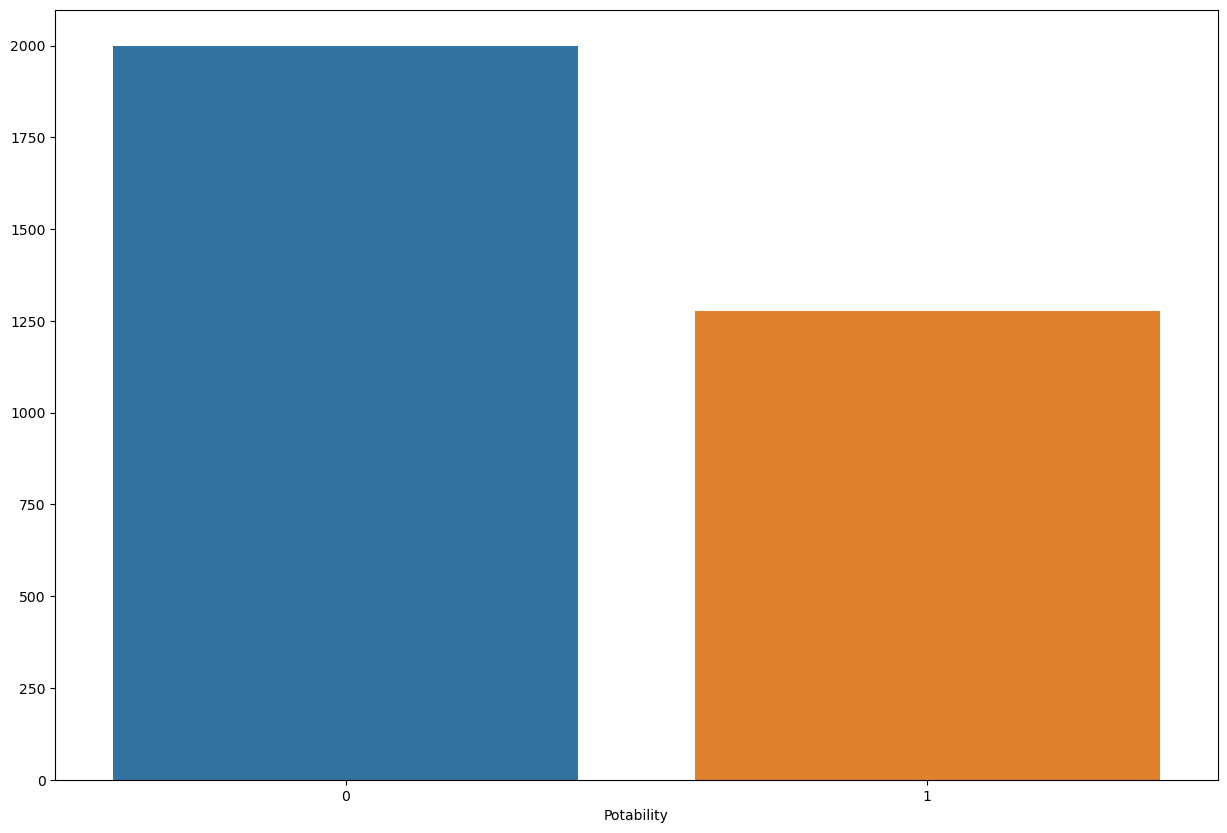

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=updated_df,x="Potability")
plt.ylabel("")
plt.title("")

In [16]:
updated_df[updated_df["Potability"] == 0]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,333.775777,417.465080,13.432557,47.945936,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,333.775777,395.114961,15.033557,92.697369,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [17]:
updated_df[updated_df["Potability"] == 1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.080795,169.974849,23403.637304,8.519730,333.775777,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<function matplotlib.pyplot.show(close=None, block=None)>

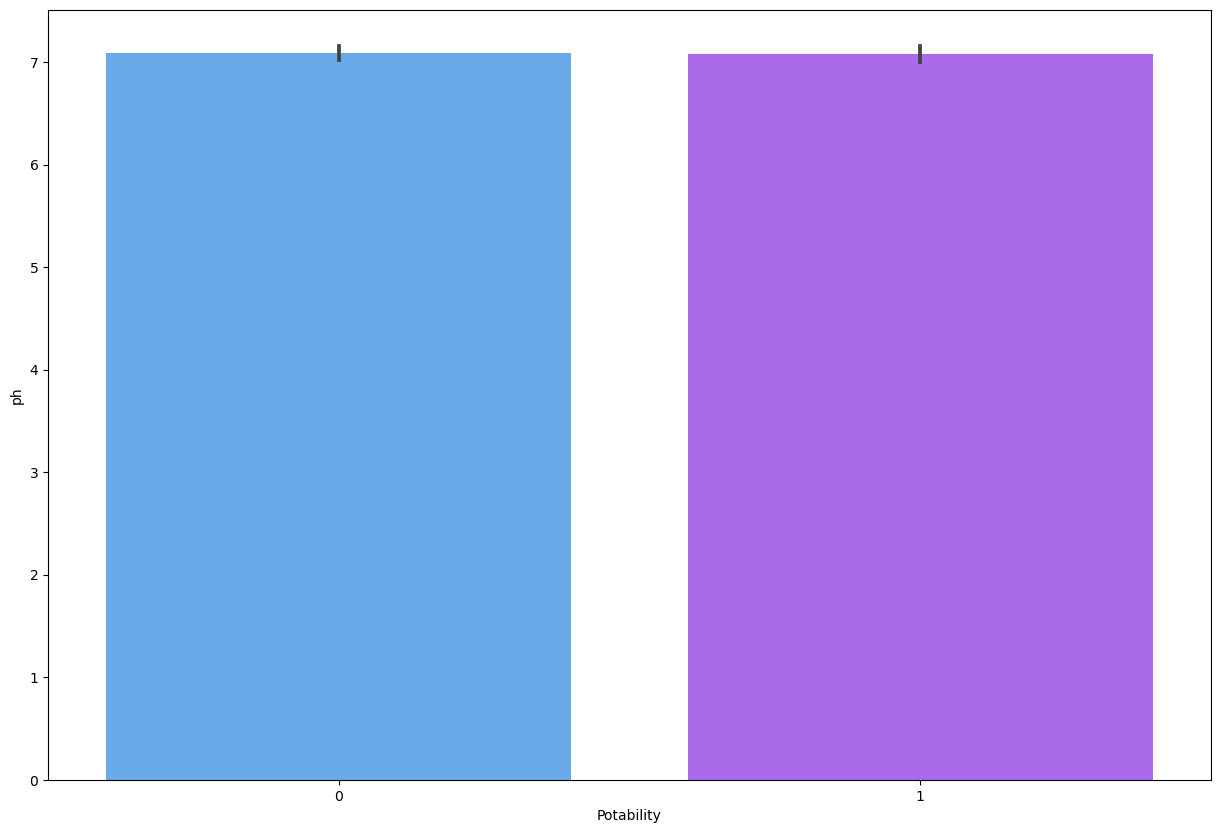

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="ph",palette="cool")
plt.show

<Axes: xlabel='Potability', ylabel='Hardness'>

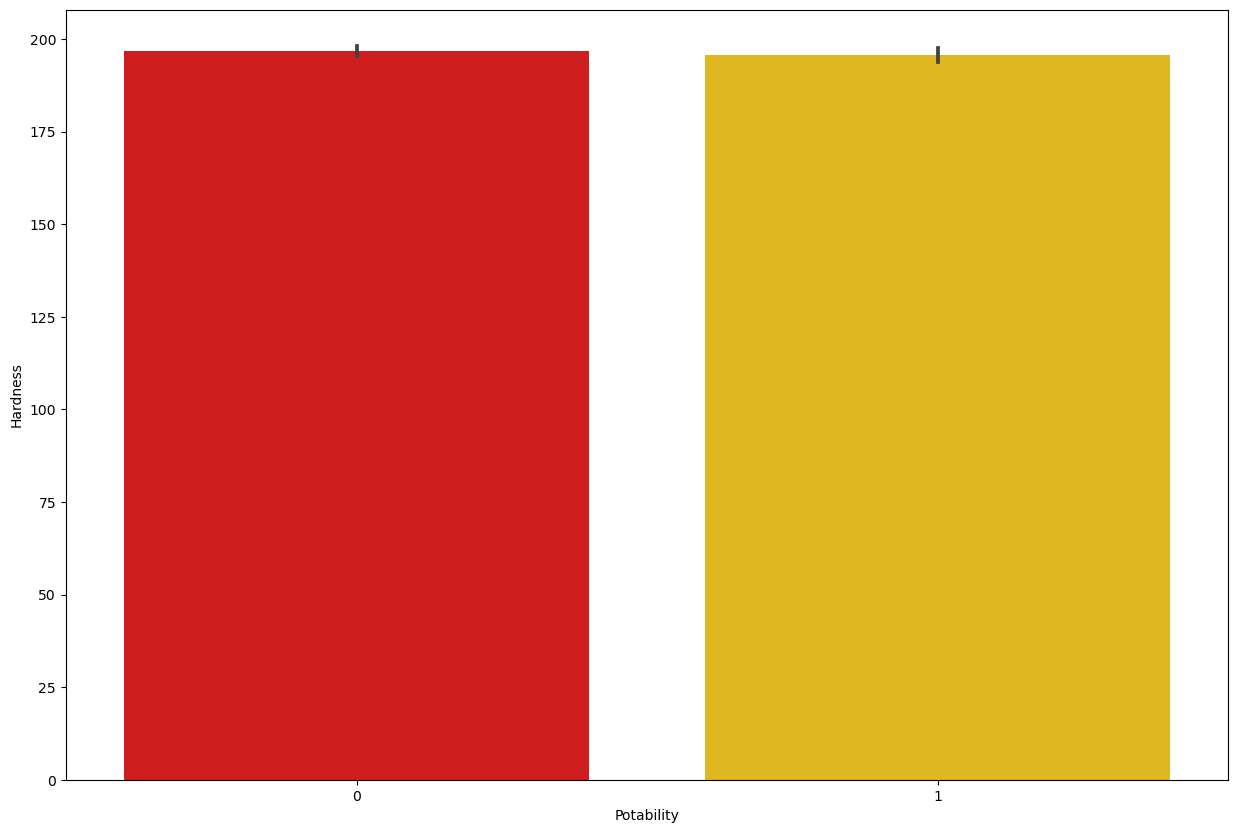

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Hardness",palette="hot")

<Axes: xlabel='Potability', ylabel='Solids'>

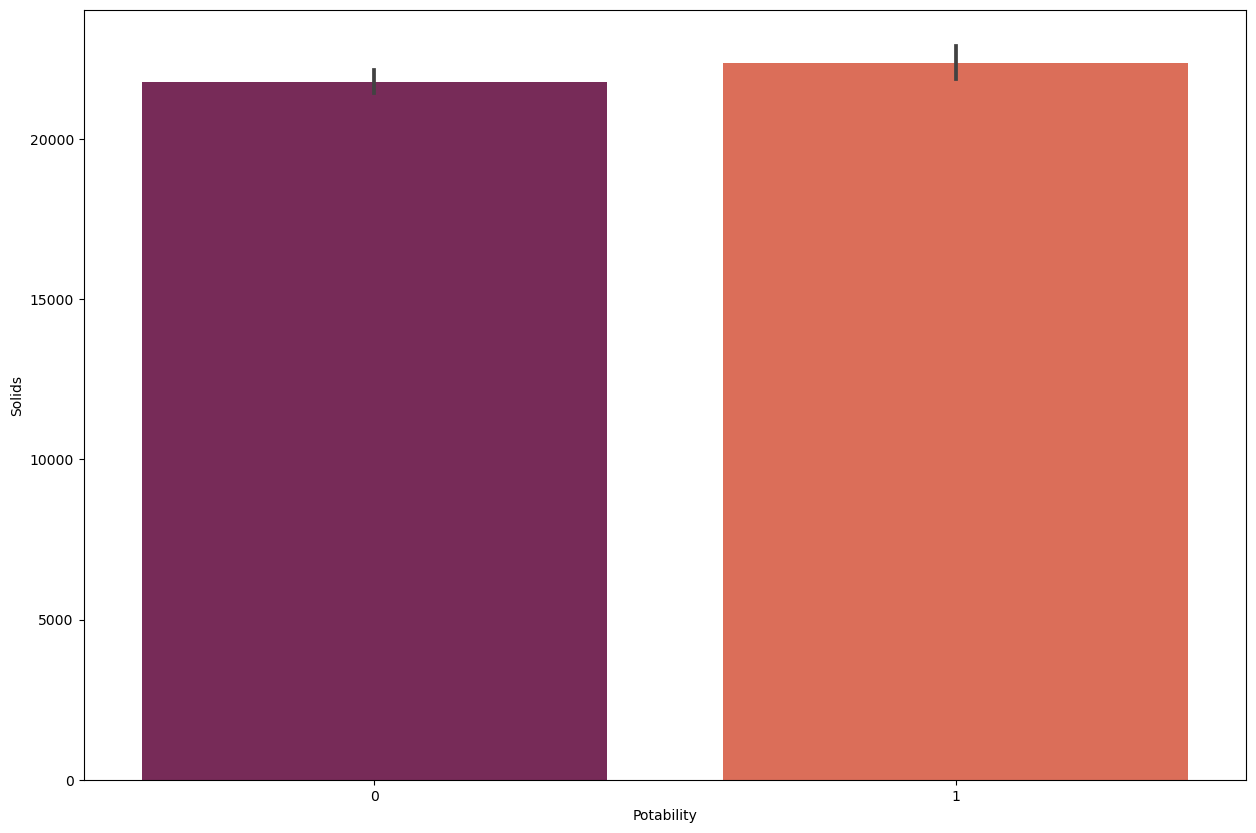

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Solids",palette="rocket")

<Axes: xlabel='Potability', ylabel='Chloramines'>

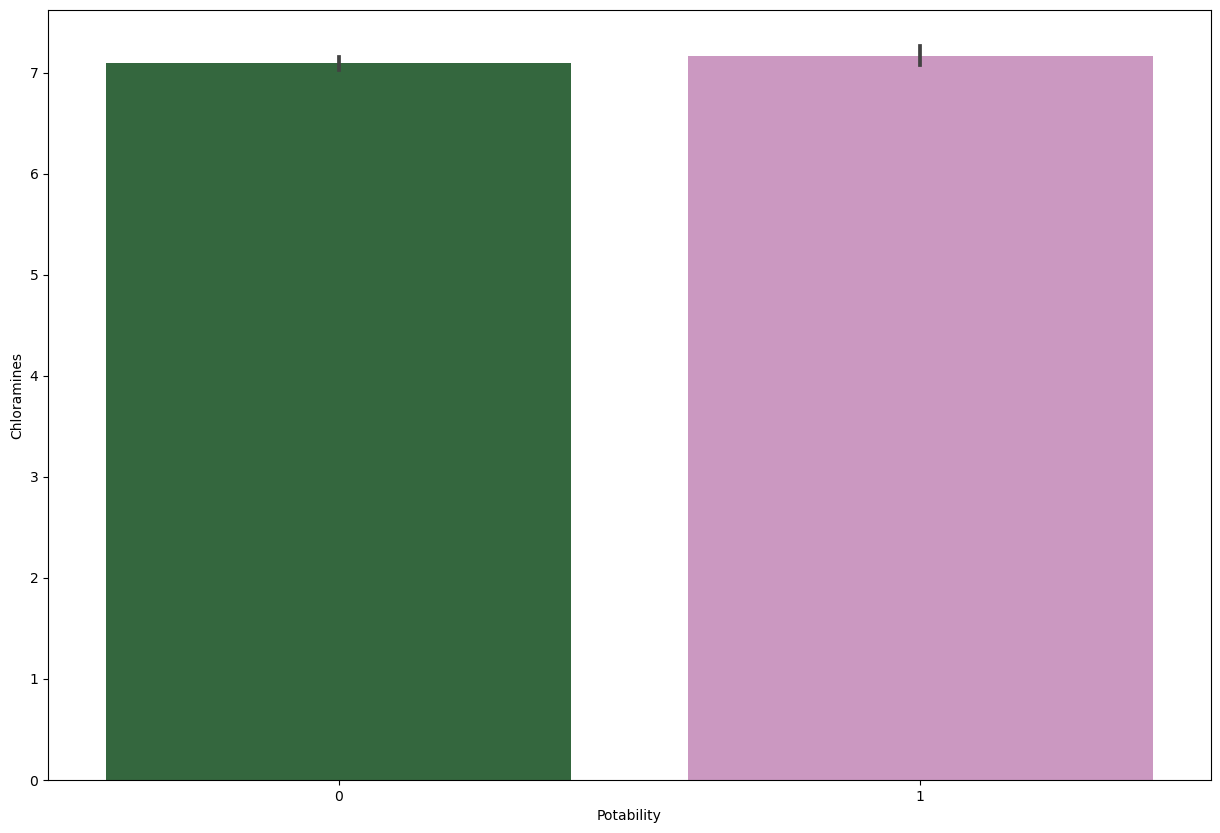

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Chloramines",palette="cubehelix")

<Axes: xlabel='Potability', ylabel='Sulfate'>

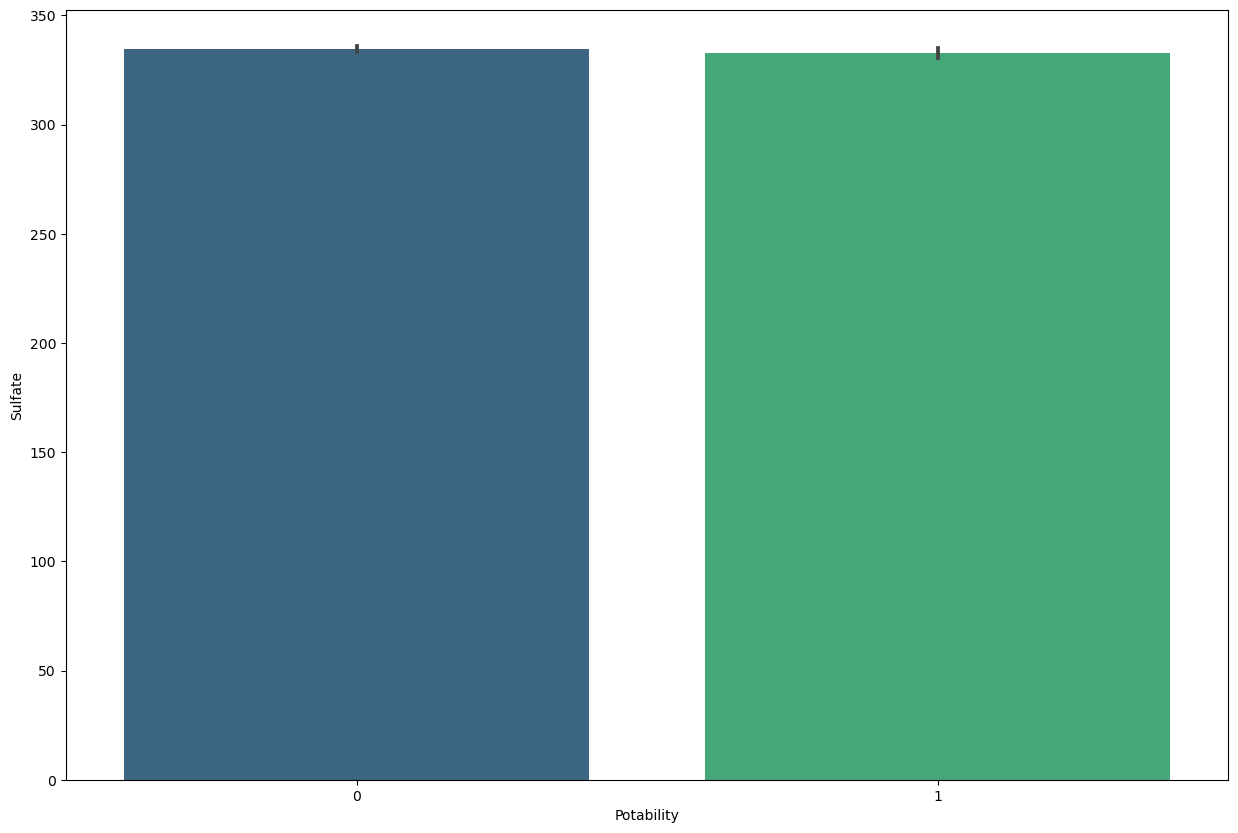

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Sulfate",palette="viridis")

<Axes: xlabel='Potability', ylabel='Conductivity'>

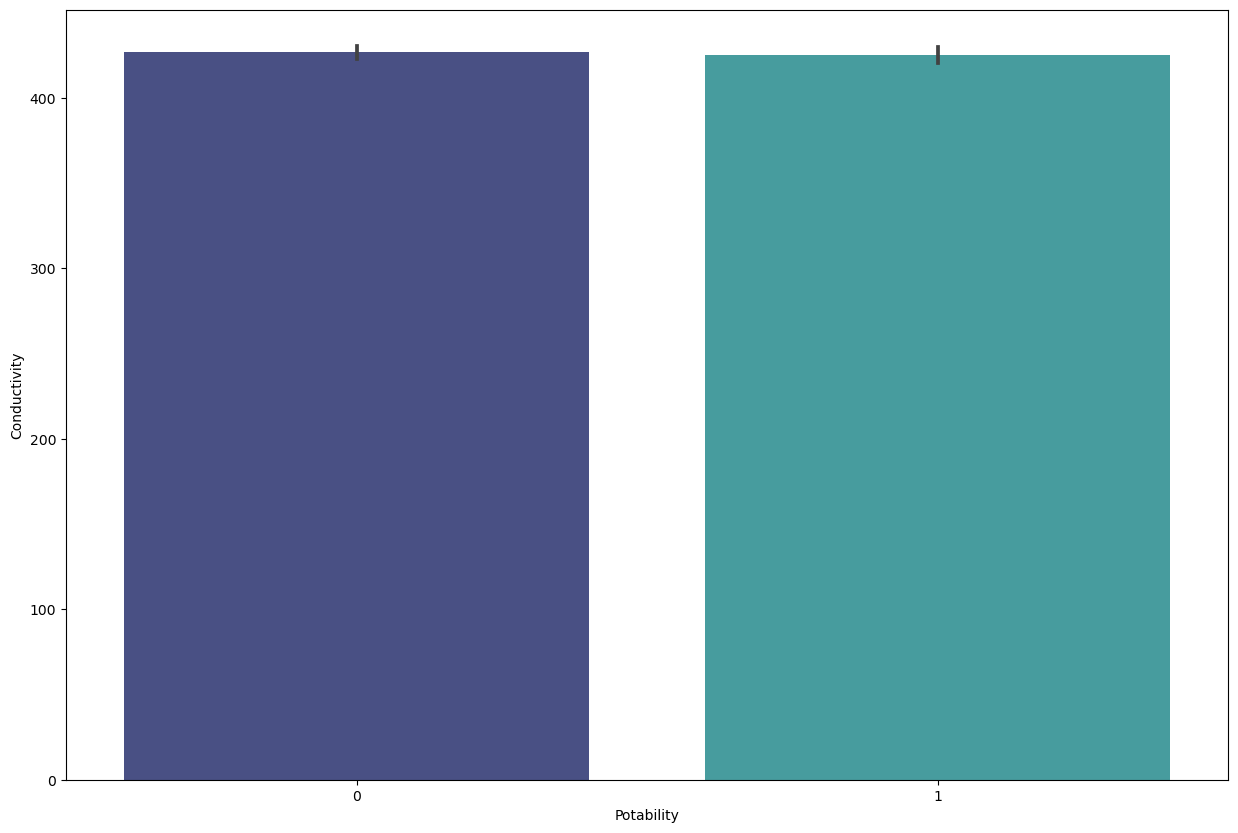

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Conductivity",palette="mako")

<Axes: xlabel='Potability', ylabel='Organic_carbon'>

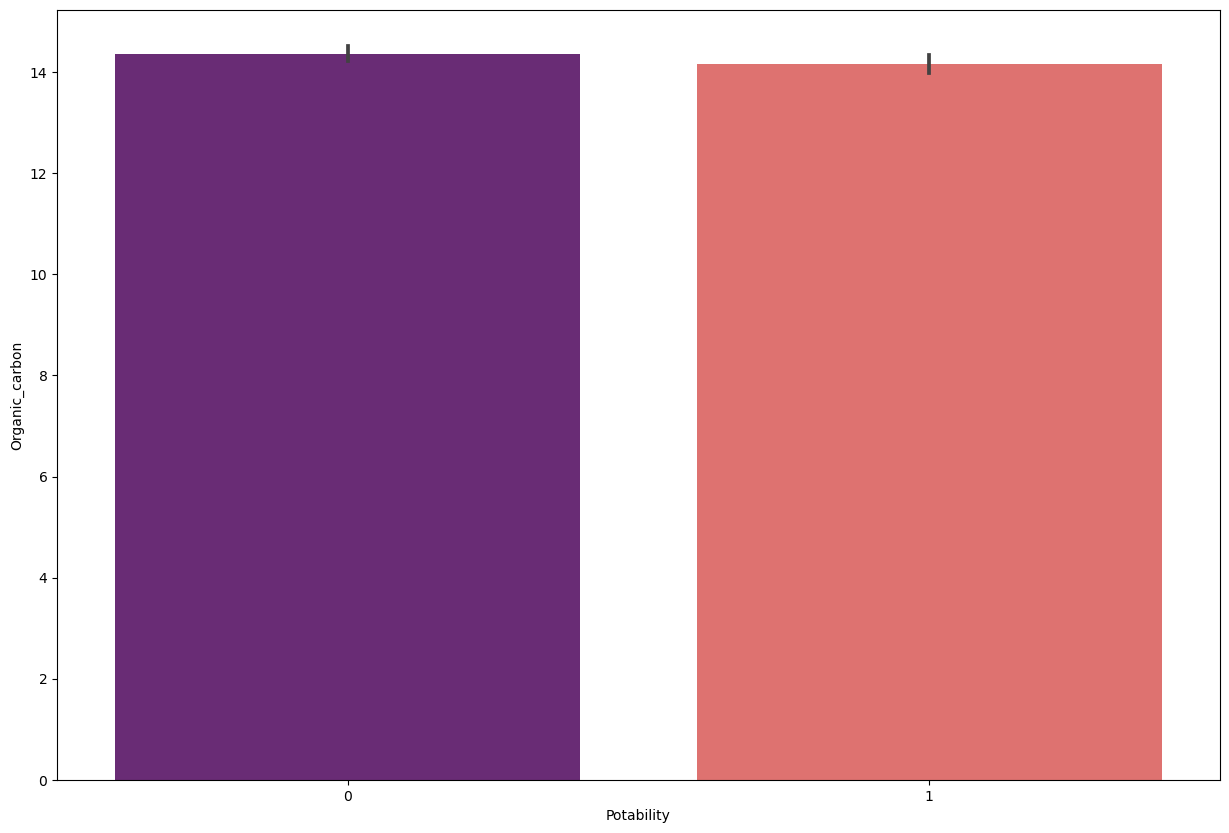

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Organic_carbon",palette="magma")

<Axes: xlabel='Potability', ylabel='Trihalomethanes'>

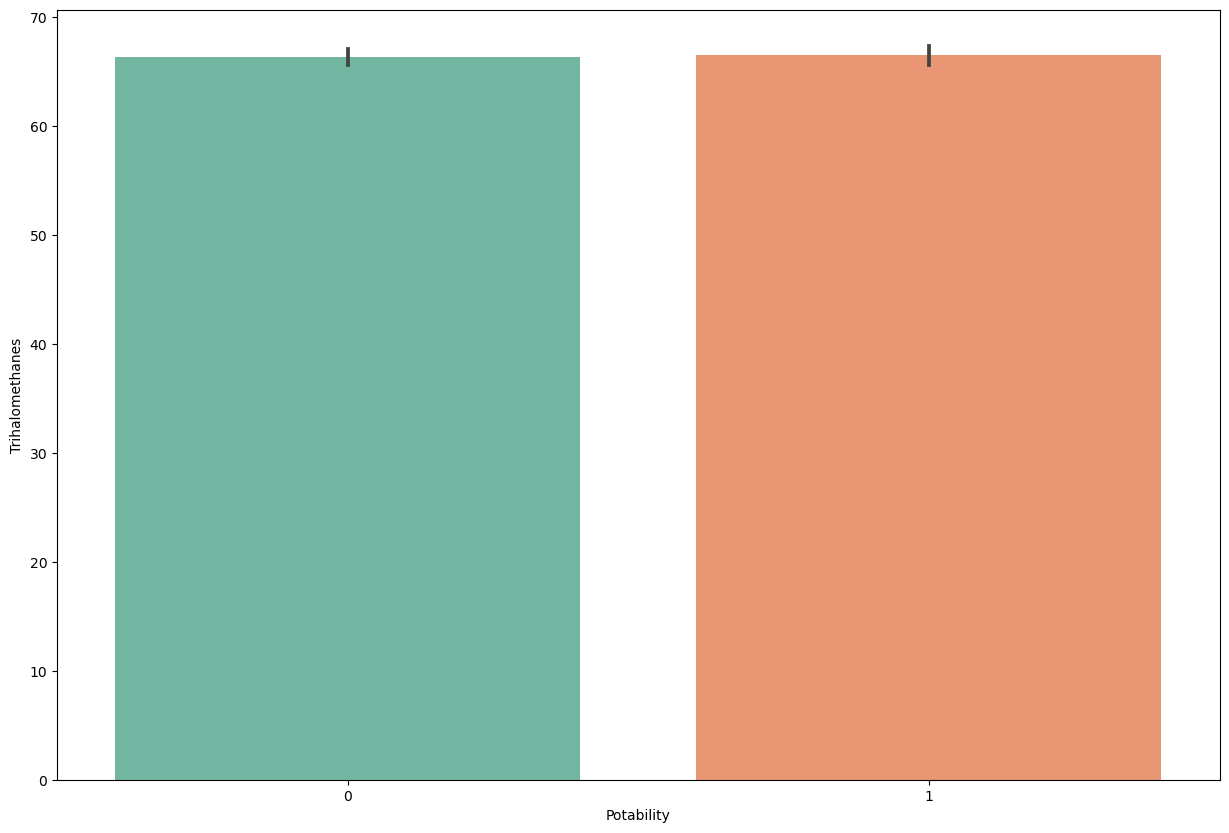

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Trihalomethanes",palette="Set2")

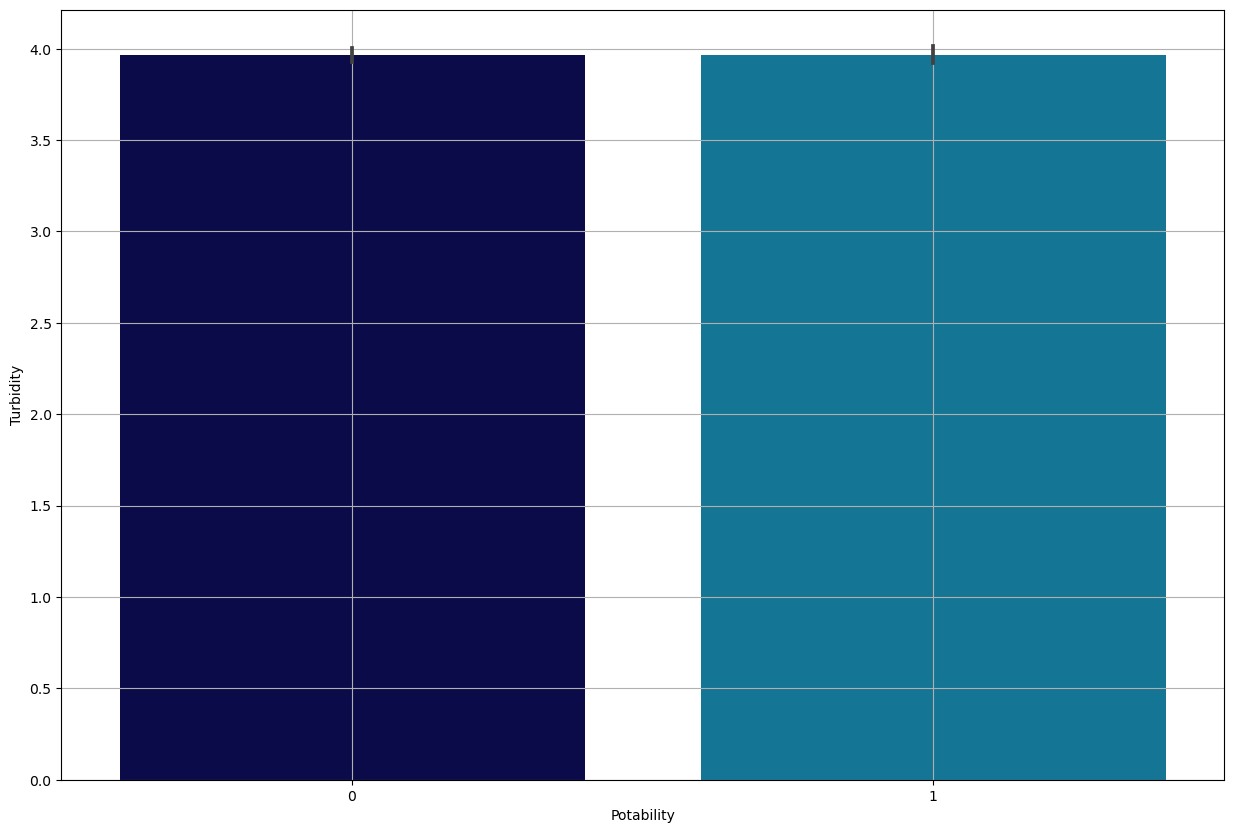

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=updated_df,x="Potability",y="Turbidity",palette="ocean")
plt.title()
plt.grid()

In [ ]:
updated_df.columns.values

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'], dtype=object)

feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler